In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss

%config InlineBackend.figure_format='svg'
%matplotlib inline

In [2]:
covertype_path = 'covtype.data'

names = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points',
]

Wilderness_Area = []
for i in range(4):
    Wilderness_Area.append('Wilderness_Area_{}'.format(i+1))

Soil_Type = []
for i in range(40):
    Soil_Type.append('Soil_Type_{}'.format(i+1))

names.extend(Wilderness_Area + Soil_Type + ['Cover_Type'])
covertype_df = pd.read_csv(covertype_path, names=names)

In [3]:
covertype_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
X = covertype_df.drop('Cover_Type',axis=1)
y = covertype_df['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.75, random_state=42)

In [5]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)
scores = cross_val_score(clf, X, y)
scores.mean()

0.56888348627238916

In [6]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=10, random_state=42)
scores = cross_val_score(clf, X, y)
scores.mean()                             

0.57880235159195392

In [7]:
names = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Ash Alcalinity', 'Magnesium', 'Total Phenols', \
           'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', \
           'Dilution', 'Proline']
# wine_path = '../../data/wine/wine.csv'
wine_path = '../../git/CSE291/CSE291/data/wine/wine.csv'
wine_df = pd.read_csv(wine_path, names=names)
X = wine_df.drop('Class',axis=1)
y = wine_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.75, random_state=42)

wine = {'Lable': 'Wine', 'X': np.array(X), 'y': np.array(y)}

In [8]:
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=10, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

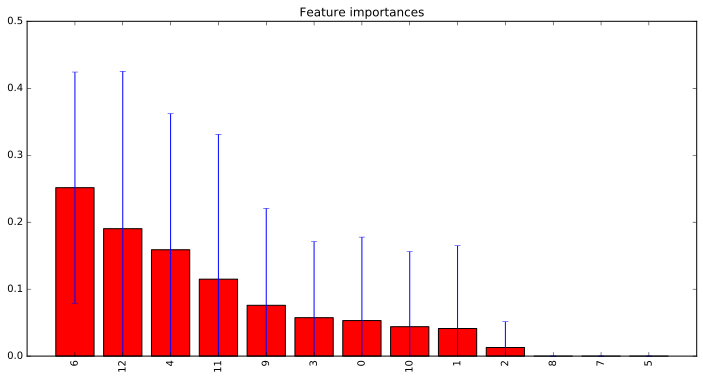

Feature ranking:
1. feature 6 (0.251521)
2. feature 12 (0.190324)
3. feature 4 (0.158838)
4. feature 11 (0.114931)
5. feature 9 (0.075912)
6. feature 3 (0.057422)
7. feature 0 (0.053066)
8. feature 10 (0.043917)
9. feature 1 (0.041221)
10. feature 2 (0.012847)
11. feature 8 (0.000000)
12. feature 7 (0.000000)
13. feature 5 (0.000000)


In [9]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.ylim(ymin=0)
plt.show()

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))